In [19]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# load data
df = pd.read_csv('../data/train.csv')
display(df.head())

,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label
0,92715872-3287-4bff-aa61-7047973e5c02.jpeg,2448,3264,1301,1546,1641,2096,albopictus
1,b0f7cc74-2272-4756-a387-38bcaf6965c8.jpeg,3024,4032,900,1897,1950,2990,albopictus
2,82df4b68-0f45-4afe-9215-48488bf3720e.jpeg,768,1024,220,58,659,808,albopictus
3,331ad30a-7564-4478-b863-7bc760adf5a1.jpeg,3456,4608,1169,2364,1586,2826,albopictus
4,1a46dbfb-104e-466b-88d7-98958d7b1fe9.jpeg,1024,1365,129,231,697,1007,culex


In [21]:
# get the image dimensions
img_w, img_h = df['img_w'].to_list(), df['img_h'].to_list()
img_dim = list(zip(img_w, img_h))

In [22]:
# get the bounding box coordinates
x1, y1, x2, y2 = df['bbx_xtl'].to_list(), df['bbx_ytl'].to_list(), df['bbx_xbr'].to_list(), df['bbx_ybr'].to_list()

In [23]:
def check_bbx(x1, y1, x2, y2, img_w, img_h):
    
    img_names = df['img_fName'].to_list()
    
    invalid = []
    
    for i in range(len(x1)):
        if x1[i] < 0 or y1[i] < 0 or x2[i] > img_w[i] or y2[i] > img_h[i]:
            print(f"Image size: {(img_w[i], img_h[i])} \n BBox size: {(x1[i], y1[i])} -> {(x2[i], y2[i])} \n")
            invalid.append((img_names[i], (x1[i], y1[i]), (x2[i], y2[i])))
    
    return invalid

# check if the bounding box coordinates are valid
invalids = check_bbx(x1, y1, x2, y2, img_w, img_h)

Image size: (1024, 2272) 
 BBox size: (877, 401) -> (1185, 640) 

Image size: (3000, 4000) 
 BBox size: (526, 29) -> (3198, 2796) 

Image size: (3024, 4032) 
 BBox size: (1681, 431) -> (3659, 2179) 

Image size: (768, 1024) 
 BBox size: (584, 224) -> (909, 488) 

Image size: (1024, 1365) 
 BBox size: (516, 15) -> (1303, 916) 



(1024, 2272) (877, 401) (1185, 640)


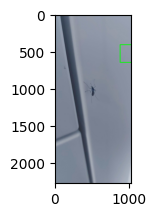

(3000, 4000) (526, 29) (3198, 2796)


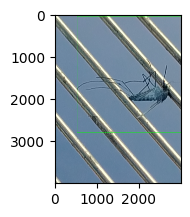

(3024, 4032) (1681, 431) (3659, 2179)


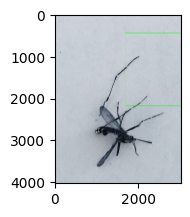

(768, 1024) (584, 224) (909, 488)


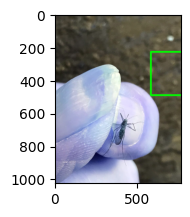

(1024, 1365) (516, 15) (1303, 916)


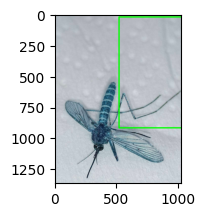

In [48]:
# takes and list of images and their
# bounding boxes and prints them
def show_bbx(imgs, bboxes):
    
    for i in range(len(imgs)):
        img = cv2.imread(imgs[i])
        x1, y1 = bboxes[i][0]
        x2, y2 = bboxes[i][1]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 10)
        
        # update the subplot
        print(tuple(reversed(img.shape[:2])), (x1, y1), (x2, y2))
        plt.subplot(len(imgs) // 3 + 1, 3, i + 1)
        plt.imshow(img)
        plt.show()
        
# show the invalid bounding boxes
show_bbx(
    [f"../data/train_images/{i[0]}" for i in invalids], 
    [i[1:] for i in invalids]
)